In [1]:
%%pyspark
df_accounts = spark.sql("SELECT * FROM `default`.`accounts`")
df_accounts.show(10)

row_count = df_accounts.count()

print(row_count)

StatementMeta(mySparkPool, 13, 2, Finished, Available)

+----------+-----+---------------+
|account_id|limit|        product|
+----------+-----+---------------+
|    371138| 9000|    Derivatives|
|    371138| 9000|InvestmentStock|
|    557378|10000|InvestmentStock|
|    557378|10000|      Commodity|
|    557378|10000|      Brokerage|
|    557378|10000|CurrencyService|
|    198100|10000|    Derivatives|
|    198100|10000|CurrencyService|
|    198100|10000|InvestmentStock|
|    674364|10000|InvestmentStock|
+----------+-----+---------------+
only showing top 10 rows

5383


In [2]:
%%pyspark
df_customers = spark.sql("SELECT * FROM `default`.`customers`")

df_customers.show(10)

row_count = df_customers.count()

print(row_count)

StatementMeta(mySparkPool, 13, 3, Finished, Available)

+----------------+---------------+--------------------+------------+----------+-------------+------------------+
|        username|           name|             address|        Time|account_id|date_of_birth|               age|
+----------------+---------------+--------------------+------------+----------+-------------+------------------+
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    371138|   1977-03-02| 46.62465753424657|
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    324287|   1977-03-02| 46.62465753424657|
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    276528|   1977-03-02| 46.62465753424657|
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    332179|   1977-03-02| 46.62465753424657|
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    422649|   1977-03-02| 46.62465753424657|
|         fmiller|  Elizabeth Ray|9286 Bethany Glen...|226117231000|    387979|   1977-03-02| 46

In [3]:
%%pyspark
df_transactions = spark.sql("SELECT * FROM `default`.`transactions`")

df_transactions.show(10)

row_count = df_transactions.count()

print(row_count)

StatementMeta(mySparkPool, 13, 4, Finished, Available)

+----------+----------+----------+-----------------+-------------------+----------------+----------------+
|account_id|  end_date|start_date|transaction_count|        bucket_time|transaction_code|transaction_date|
+----------+----------+----------+-----------------+-------------------+----------------+----------------+
|    918519|2015-03-24|2015-02-23|                1|0.07945205479452055|            sell|      2015-03-20|
|    923502|2017-01-06|2000-06-30|               90|  16.53150684931507|            sell|      2015-07-24|
|    923502|2017-01-06|2000-06-30|               90|  16.53150684931507|            sell|      2010-02-12|
|    923502|2017-01-06|2000-06-30|               90|  16.53150684931507|            sell|      2014-12-18|
|    923502|2017-01-06|2000-06-30|               90|  16.53150684931507|            sell|      2010-09-30|
|    923502|2017-01-06|2000-06-30|               90|  16.53150684931507|            sell|      2015-04-13|
|    923502|2017-01-06|2000-06-30|   

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, explode,current_date, datediff,from_unixtime, expr, avg
from pyspark.sql.types import IntegerType
from datetime import datetime
from pyspark.ml.feature import Bucketizer

StatementMeta(mySparkPool, 13, 6, Finished, Available)

In [6]:
# wieviele accounts haben Kunden durchschnittlich?

average_accounts_per_customer = df_customers.groupBy("username").count().alias("count")

avg_count = average_accounts_per_customer.agg(avg("count"))

avg_count.show()

#average_accounts_per_customer.show()

StatementMeta(mySparkPool, 13, 7, Finished, Available)

+----------------+
|      avg(count)|
+----------------+
|3.51307847082495|
+----------------+



StatementMeta(mySparkPool, 11, 7, Finished, Available)

+---------------+-----+
|        product|count|
+---------------+-----+
|InvestmentStock| 1746|
|      Brokerage|  741|
|      Commodity|  720|
| InvestmentFund|  728|
|CurrencyService|  742|
|    Derivatives|  706|
+---------------+-----+



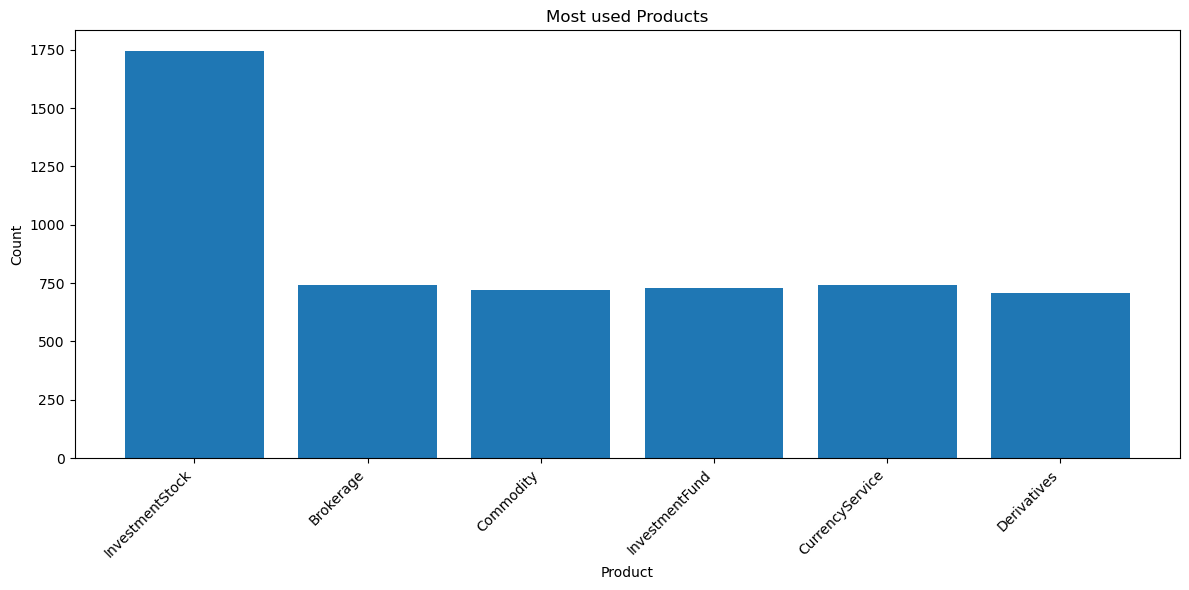

In [56]:
# meistgenutze Produckte

product_counts = df_accounts.groupBy("product").count()

product_counts.show()

pd_df = product_counts.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(pd_df["product"],pd_df["count"])
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Most used Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [7]:
# join togehther the accounts and the customers dataframe with inner join

df_joined_acc_cust = df_customers.join(df_accounts, on=["account_id"], how="left")

#df_joined_acc_cust.show()

#rows = df_joined_acc_cust.count()
df_joined_acc_cust.describe().show()


StatementMeta(mySparkPool, 13, 8, Finished, Available)

+-------+-----------------+--------+--------------+--------------------+--------------------+-------------+------------------+-----------------+---------------+
|summary|       account_id|username|          name|             address|                Time|date_of_birth|               age|            limit|        product|
+-------+-----------------+--------+--------------+--------------------+--------------------+-------------+------------------+-----------------+---------------+
|  count|             5391|    5391|          5391|                5391|                5391|         5391|              5391|             5391|           5391|
|   mean| 524046.965312558|    null|          null|                null|3.916789551786310...|         null|41.375826783858486|9955.295863476164|           null|
| stddev|275979.0261110625|    null|          null|                null|2.862789013430039E11|         null|  9.07784204792408|345.1832088891742|           null|
|    min|           100721|  abrow

In [8]:
age_bins = [26, 32, 38, 44, 50, 58]
df_joined_acc_cust

bucketizer = Bucketizer(splits=age_bins, inputCol="age", outputCol="age_group")

bucketized_df = bucketizer.transform(df_joined_acc_cust)

bucketized_df.show()

StatementMeta(mySparkPool, 13, 9, Finished, Available)

+----------+--------+-------------+--------------------+------------+-------------+-----------------+-----+---------------+---------+
|account_id|username|         name|             address|        Time|date_of_birth|              age|limit|        product|age_group|
+----------+--------+-------------+--------------------+------------+-------------+-----------------+-----+---------------+---------+
|    371138| fmiller|Elizabeth Ray|9286 Bethany Glen...|226117231000|   1977-03-02|46.62465753424657| 9000|InvestmentStock|      3.0|
|    371138| fmiller|Elizabeth Ray|9286 Bethany Glen...|226117231000|   1977-03-02|46.62465753424657| 9000|    Derivatives|      3.0|
|    324287| fmiller|Elizabeth Ray|9286 Bethany Glen...|226117231000|   1977-03-02|46.62465753424657|10000|InvestmentStock|      3.0|
|    324287| fmiller|Elizabeth Ray|9286 Bethany Glen...|226117231000|   1977-03-02|46.62465753424657|10000|    Derivatives|      3.0|
|    324287| fmiller|Elizabeth Ray|9286 Bethany Glen...|226117

In [9]:
age_bins = [26, 30, 34,38, 42, 46 ,50, 54, 58]

bucketizer = Bucketizer(splits=age_bins, inputCol="age", outputCol="age_group")

df_ageGroup = bucketizer.transform(df_customers)

df_ageGroup = df_ageGroup.dropDuplicates(subset=["username"])

rows = df_ageGroup.count()

df_ageGroup.show()

print(rows)

StatementMeta(mySparkPool, 13, 10, Finished, Available)

+--------------+------------------+--------------------+-------------+----------+-------------+------------------+---------+
|      username|              name|             address|         Time|account_id|date_of_birth|               age|age_group|
+--------------+------------------+--------------------+-------------+----------+-------------+------------------+---------+
|        abrown|       Ray Jenkins|USNS Thomas\nFPO ...| 132245243000|    146756|   1974-03-11|49.602739726027394|      5.0|
|   alexandra72|       Amy Bennett|6327 Jones Manors...| 265543841000|    337202|   1978-06-01| 45.37534246575343|      4.0|
|   alexsanders|     Annette Watts|5094 Gonzales Man...| 587907783000|    107787|   1988-08-18|35.153424657534245|      2.0|
|  allenhubbard|   Bradley Roberts|55313 Elliott Tur...| 841186612000|    857368|   1996-08-27|27.123287671232877|      0.0|
| allenjennifer|     Brian Woodard|USNV Black\nFPO A...| 216546864000|     66611|   1976-11-11| 46.92876712328767|      5.0|


StatementMeta(mySparkPool, 13, 11, Finished, Available)

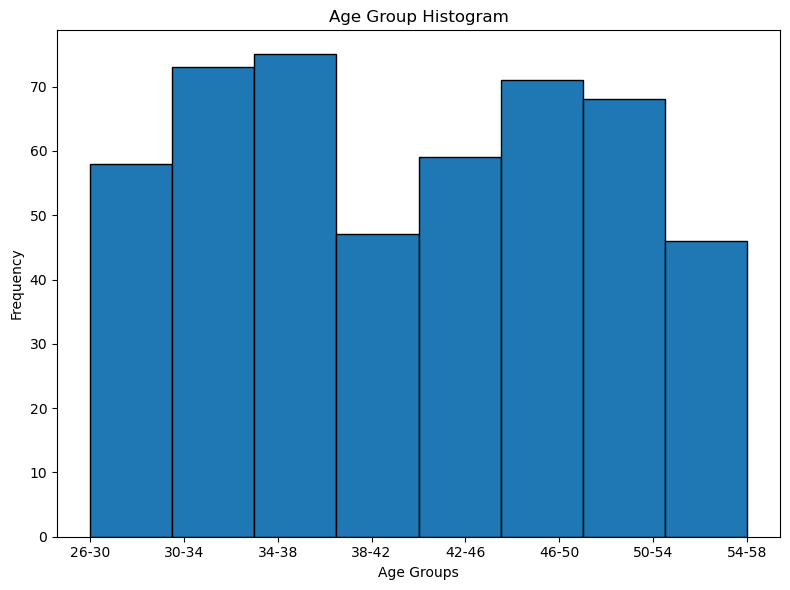

In [10]:

pandas_df = df_ageGroup.select("age_group").toPandas()


plt.figure(figsize=(8, 6))
plt.hist(pandas_df["age_group"], bins=8, edgecolor="k")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.title("Age Group Histogram")
plt.xticks(ticks= range(8), labels=["26-30", "30-34", "34-38", "38-42", "42-46", "46-50", "50-54", "54-58"])  # Assuming you have 6 age groups
plt.tight_layout()

In [13]:
result_df = bucketized_df.groupBy("product", "age_group").count()

result_df.show()

result_df.printSchema()

StatementMeta(mySparkPool, 13, 14, Finished, Available)

+---------------+---------+-----+
|        product|age_group|count|
+---------------+---------+-----+
| InvestmentFund|      4.0|  174|
|InvestmentStock|      3.0|  352|
|      Brokerage|      0.0|  143|
|      Commodity|      4.0|  185|
|    Derivatives|      0.0|  139|
| InvestmentFund|      3.0|  137|
|    Derivatives|      3.0|  146|
|      Brokerage|      3.0|  152|
|    Derivatives|      1.0|  152|
|CurrencyService|      4.0|  164|
| InvestmentFund|      1.0|  161|
|    Derivatives|      2.0|  108|
|InvestmentStock|      0.0|  377|
|InvestmentStock|      4.0|  392|
|CurrencyService|      2.0|   98|
|      Brokerage|      1.0|  170|
|      Commodity|      2.0|  101|
|    Derivatives|      4.0|  161|
|CurrencyService|      3.0|  142|
|CurrencyService|      1.0|  160|
+---------------+---------+-----+
only showing top 20 rows

root
 |-- product: string (nullable = true)
 |-- age_group: double (nullable = true)
 |-- count: long (nullable = false)



In [15]:
age_group_totals = result_df.groupBy("age_group").agg(sum("count").alias("total_count"))

age_group_totals.show()

StatementMeta(mySparkPool, 13, 16, Finished, Available)

TypeError: unsupported operand type(s) for +: 'int' and 'str'